```
Deep Learning Projects: Fundamentals of Deep Learning:
For the Deep Learning Using TensorFlow and Keras Course;
Author: Arta Khosravi

# Question 3

<div dir="auto" >
<p style='text-align: right;'>
<br>
با مراجعه به لینک (https://www.kaggle.com/hellbuoy/car-price-prediction) دیتاست خودروهای دست دوم را دانلود کنید. با توجه به مجزا بودن فایل‌های csv، آن‌ها را در یک دیتافریم در پایتون به هم بچسبانید. در این داده هدف آن است با توجه به ویژگی‌های خودروها مانند مسافت طی کرده، اتومات یا دستی بودن، سوخت موتور و ... که ستون‌های داده هستند، ستون قیمت را پیش‌بینی کنید.

- با استفاده از مصورسازی‌های مناسب، داده را تحلیل کنید. (مثال: هیستوگرام نوع سوخت موتور)
- 15 درصد داده را برای test و بقیه را برای train و validation استفاده کنید.
- شبکه عصبی مناسبی برای این پیش‌بینی طراحی و بهینه‌سازی کرده و loss و معیارهای rmse و mae را برای 100 epoch نمایش دهید.
- شبکه‌ای با یک لایه و نورون‌های بین 50 تا 500 برای حل این مسئله طراحی کنید. مساله را برای 5 تعداد نورون مختلف حل کنید و مینیمم mae بدست آمده را برای هر تعداد نورون در یک گراف رسم کنید. اثر افزایش تعداد نورون را تحلیل کنید.
- شبکه‌ای با 100 نورون در هر لایه و تعداد لایه‌های 1، 2، 5 و 7 بسازید. مانند مرحله قبل، مینیمم mae بدست آمده را برای هر تعداد لایه رسم کنید. اثر افزایش تعداد لایه را تحلیل کنید.
- شبکه wide and deep مناسبی برای حل این مسئله پیاده‌سازی کرده و نتایج را با شبکه deep بهینه شده مقایسه کنید. 
</p>
</div>


<br>
Download the used car dataset by referring to the link (https://www.kaggle.com/hellboy/car-price-prediction). Given that the csv files are separate, paste them together into a dataframe in Python. In this purpose, predict the columns according to the characteristics of the cars, such as distance traveled, automatic or manual, engine fuel, etc., which are data columns.

- Analyze the data using appropriate visualizations. (Example: histogram of engine fuel type)
- Use 15% for testing and the rest for train and validation.
- Design and optimize a suitable neural network for this prediction and display the loss and rmse and mae indicators for 100 periods.
- Design networks with one layer and between 50 and 500 neurons to solve this problem. Solve the problem for 5 different numbers of neurons and draw a graph for each number of neurons. Analyze the effect of increasing the number of neurons.
- Create a network with 100 neurons per layer and number of layers 1, 2, 5 and 7. As in the previous step, plot the obtained minimum mae for any number of layers. Analyze the effect of increasing the number of layers.
- Implement a suitable wide and deep network to solve this issue and compare the results with the optimal deep network.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
%config InlineBackend.figure_format = 'retina'
# sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
path = "C:/Users/Asus/Downloads"
df_carpr = pd.read_csv(path+r"/CarPrice_Assignment.csv")
df_carpr.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [32]:
df_carpr.shape

(205, 26)

In [34]:
df_carpr.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [36]:
df_carpr.duplicated().sum()

0

In [38]:
df_carpr.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [40]:
df_carpr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Pt. 1

In [42]:
df_carpr.describe().T

count          mean          std      min      25%  \
car_ID            205.0    103.000000    59.322565     1.00    52.00   
symboling         205.0      0.834146     1.245307    -2.00     0.00   
wheelbase         205.0     98.756585     6.021776    86.60    94.50   
carlength         205.0    174.049268    12.337289   141.10   166.30   
carwidth          205.0     65.907805     2.145204    60.30    64.10   
carheight         205.0     53.724878     2.443522    47.80    52.00   
curbweight        205.0   2555.565854   520.680204  1488.00  2145.00   
enginesize        205.0    126.907317    41.642693    61.00    97.00   
boreratio         205.0      3.329756     0.270844     2.54     3.15   
stroke            205.0      3.255415     0.313597     2.07     3.11   
compressionratio  205.0     10.142537     3.972040     7.00     8.60   
horsepower        205.0    104.117073    39.544167    48.00    70.00   
peakrpm           205.0   5125.121951   476.985643  4150.00  4800.00   
citympg           205.0     25.219512     6.542142    13.00    19.00   
highwaympg        205.0     30.751220     6.886443    16.00    25.00   
price             205.0  13276.710571  7988.852332  5118.00  7788.00   

                       50%       75%       max  
car_ID              103.00    154.00    205.00  
symboling             1.00      2.00      3.00  
wheelbase            97.00    102.40    120.90  
carlength           173.20    183.10    208.10  
carwidth             65.50     66.90     72.30  
carheight            54.10     55.50     59.80  
curbweight         2414.00   2935.00   4066.00  
enginesize          120.00    141.00    326.00  
boreratio             3.31      3.58      3.94  
stroke                3.29      3.41      4.17  
compressionratio      9.00      9.40     23.00  
horsepower           95.00    116.00    288.00  
peakrpm            5200.00   5500.00   6600.00  
citympg              24.00     30.00     49.00  
highwaympg           30.00     34.00     54.00  
price             10295.00  16503.00  45400.00

In [44]:
#Car name and car_ID does admittedly not have enough imporatance for the price prediction, so it will be dropped.
df_carpr = df_carpr.drop(columns=['CarName','car_ID'])

In [48]:
#histogram:
colors = ['green', 'orange', 'plum','hotpink','blue',
          'red','brown','lightblue','yellow','magenta',
          'crimson','black','lightgreen','cyan','bisque',
          'cadetblue','gold','tomato','lightsteelblue','darkkhaki',
          'sienna','slategray','orchid','lavender','aquamarine',
          'white']
fig, axes = plt.subplots(8, 3, figsize=(35, 50))
axes = axes.flatten()
params_plt = {'axes.titlesize':'25',
              'xtick.labelsize':'25',
              'ytick.labelsize':'25'}

for i, variable in enumerate(df_carpr.columns):
    color = colors[i]
    sns.histplot(df_carpr[variable], ax=axes[i],alpha=0.5, color=color)
    axes[i].set_title(variable,fontsize=25)
    # axes[i].tick_params(axis='x', labelrotation=90)
    axes[i].grid(True)
    axes[i].set_xlabel(df_carpr.columns[i],fontsize=25)
    axes[i].set_ylabel('Count',fontsize=25)
    matplotlib.rcParams.update(params_plt)

# axes[len(df_carpr.columns)].set_visible(False)
fig.tight_layout()
plt.show()

In [54]:
#barplot:
colors = ['green', 'orange', 'plum','hotpink','blue',
          'red','brown','lightblue','yellow','magenta',
          'crimson','black','lightgreen','cyan','bisque',
          'cadetblue','gold','tomato','lightsteelblue','darkkhaki',
          'sienna','slategray','orchid','lavender','aquamarine',
          'white']
fig, axes_bp = plt.subplots(8, 3, figsize=(35, 50))
axes_bp = axes_bp.flatten()

for i, variable in enumerate(df_carpr.columns):
    data_group = df_carpr.groupby(by=[variable], as_index=False).count()
    color = colors[i]
    sns.barplot(x=variable, y="price",data=data_group, ax=axes_bp[i], color=color)
    # axes_bp[i].tick_params(axis='x', labelrotation=90)
    axes_bp[i].set_title(variable,fontsize=25)
    axes_bp[i].grid(True)
    axes_bp[i].set_xlabel(df_carpr.columns[i],fontsize=25)
    axes_bp[i].set_ylabel('Count',fontsize=25)
    
# axes_bp[len(df_carpr.columns)].set_visible(False)
fig.tight_layout()
plt.show()

In [58]:
default_param = {'axes.titlesize':'5',
              'xtick.labelsize':'8',
              'ytick.labelsize':'8'}
# matplotlib.rcParams.update(default_param)

C:\Users\Asus\AppData\Local\Temp\ipykernel_9392\2921076335.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  if len(df_carpr.groupby(variable)) < 10:


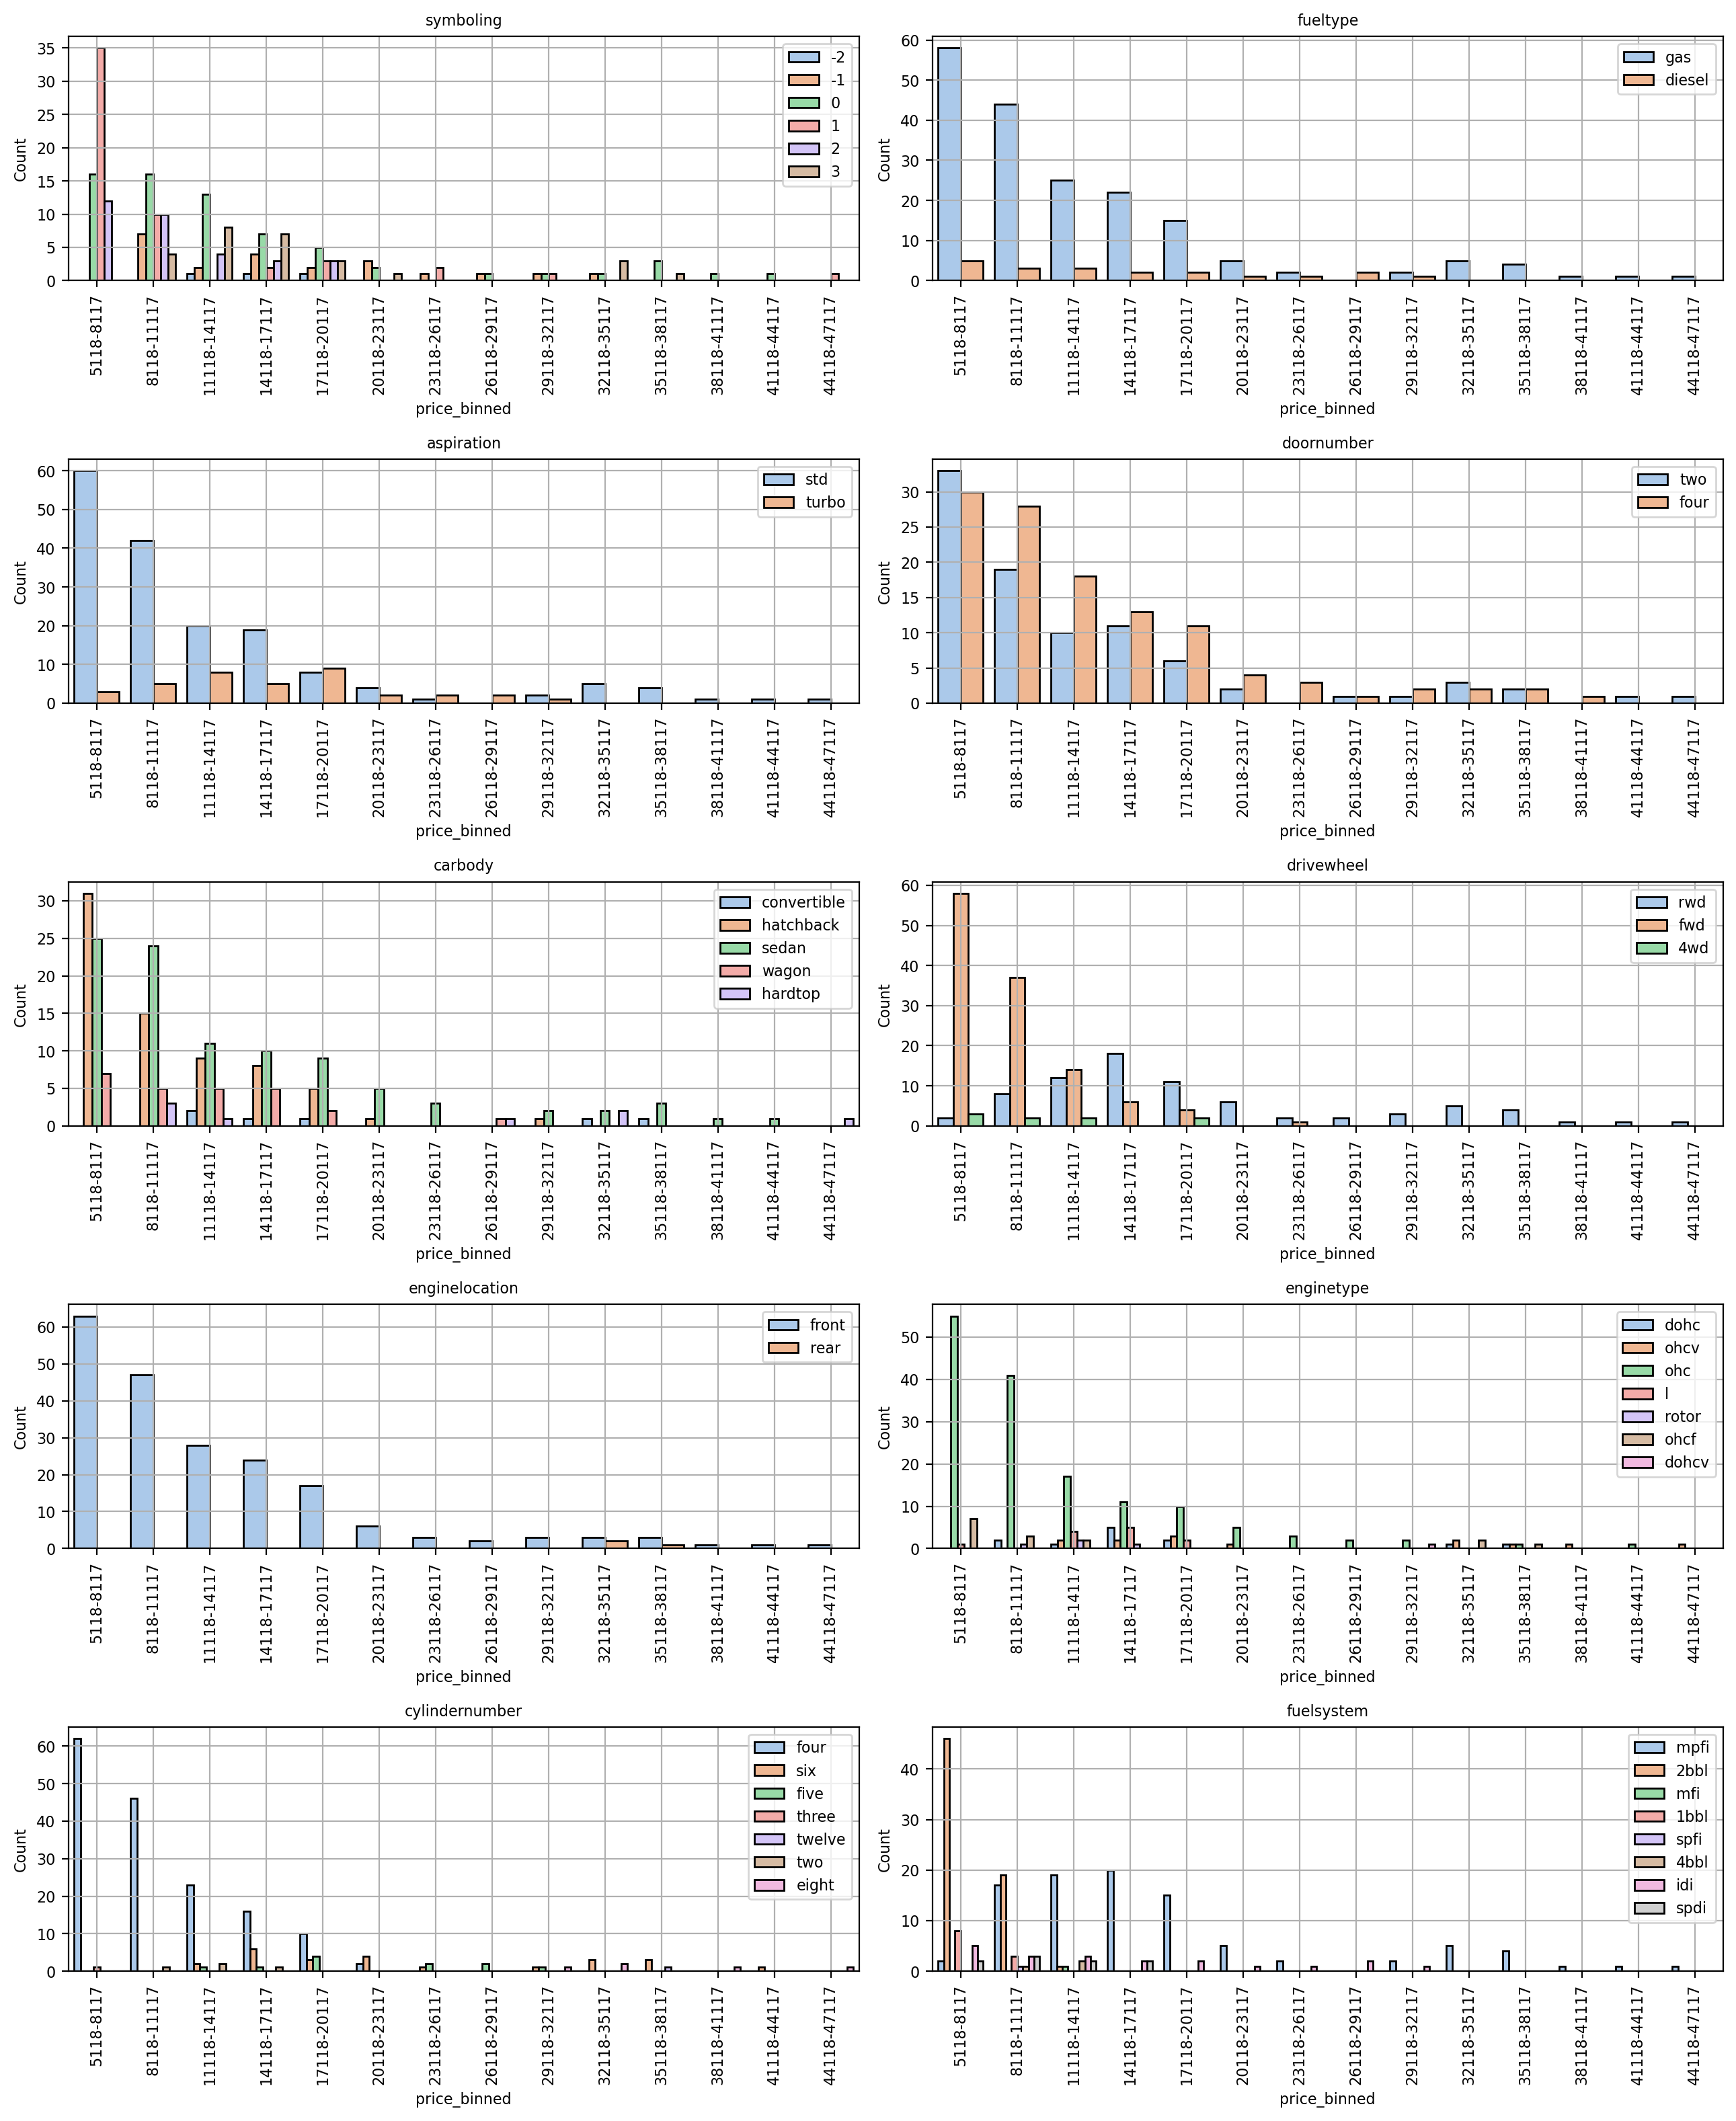

In [92]:
#countplot:

fig, axes_count = plt.subplots(13, 2, figsize=(13, 40))
axes_count = axes_count.flatten()
ax_num = 0
bins = range(round(min(df_carpr.price)),round(max(df_carpr.price)) + 3000,3000)
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]
df_carpr['price_binned'] = pd.cut(df_carpr['price'], bins=bins, labels=labels, right=False)
matplotlib.rcParams.update(default_param)

for i, variable in enumerate(df_carpr.columns):
    if len(df_carpr.groupby(variable)) < 10:
        ax = axes_count[ax_num]
        sns.countplot(x='price_binned', hue=variable, data=df_carpr, ax=ax, palette='pastel', edgecolor='black', linewidth=1)
        ax.tick_params(axis='x', labelrotation=90)
        ax.set_title(variable,fontsize=8)
        ax.grid(True)
        ax.legend(fontsize = 8)
        ax.set_xlabel('price_binned',fontsize=8)
        ax.set_ylabel('Count',fontsize=8)
        ax_num += 1
for j in range(ax_num, len(axes_count)):
    axes_count[j].set_visible(False)

fig.tight_layout()
plt.show()

In [94]:
df_carpr

symboling fueltype aspiration doornumber      carbody drivewheel  \
0            3      gas        std        two  convertible        rwd   
1            3      gas        std        two  convertible        rwd   
2            1      gas        std        two    hatchback        rwd   
3            2      gas        std       four        sedan        fwd   
4            2      gas        std       four        sedan        4wd   
..         ...      ...        ...        ...          ...        ...   
200         -1      gas        std       four        sedan        rwd   
201         -1      gas      turbo       four        sedan        rwd   
202         -1      gas        std       four        sedan        rwd   
203         -1   diesel      turbo       four        sedan        rwd   
204         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  \
0            front       88.6      168.8      64.1  ...        mpfi   
1            front       88.6      168.8      64.1  ...        mpfi   
2            front       94.5      171.2      65.5  ...        mpfi   
3            front       99.8      176.6      66.2  ...        mpfi   
4            front       99.4      176.6      66.4  ...        mpfi   
..             ...        ...        ...       ...  ...         ...   
200          front      109.1      188.8      68.9  ...        mpfi   
201          front      109.1      188.8      68.8  ...        mpfi   
202          front      109.1      188.8      68.9  ...        mpfi   
203          front      109.1      188.8      68.9  ...         idi   
204          front      109.1      188.8      68.9  ...        mpfi   

     boreratio stroke compressionratio  horsepower peakrpm  citympg  \
0         3.47   2.68              9.0         111    5000       21   
1         3.47   2.68              9.0         111    5000       21   
2         2.68   3.47              9.0         154    5000       19   
3         3.19   3.40             10.0         102    5500       24   
4         3.19   3.40              8.0         115    5500       18   
..         ...    ...              ...         ...     ...      ...   
200       3.78   3.15              9.5         114    5400       23   
201       3.78   3.15              8.7         160    5300       19   
202       3.58   2.87              8.8         134    5500       18   
203       3.01   3.40             23.0         106    4800       26   
204       3.78   3.15              9.5         114    5400       19   

     highwaympg    price  price_binned  
0            27  13495.0   11118-14117  
1            27  16500.0   14118-17117  
2            26  16500.0   14118-17117  
3            30  13950.0   11118-14117  
4            22  17450.0   17118-20117  
..          ...      ...           ...  
200          28  16845.0   14118-17117  
201          25  19045.0   17118-20117  
202          23  21485.0   20118-23117  
203          27  22470.0   20118-23117  
204          25  22625.0   20118-23117  

[205 rows x 25 columns]

### Pt.2:

In [248]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_carpr_noprice = df_carpr.drop(columns=['price_binned'])
column_obj = list(df_carpr_noprice.select_dtypes(include=[object]).columns)
column_num = list(df_carpr.select_dtypes(exclude=[object]).columns)

for variable in column_obj:
    prep_lab = preprocessing.LabelEncoder()
    prep_lab.fit(df_carpr_noprice[variable].unique())
    df_carpr_noprice[variable] = prep_lab.transform(df_carpr_noprice[variable])

X = df_carpr_noprice.values.astype(float)
Y = df_carpr['price'].values

sc = StandardScaler()
# sc = MinMaxScaler()
Y_scaled = sc.fit_transform(Y.reshape(-1,1)).flatten()
# X_scaled = sc.fit_transform(X)

X_train_rest, X_test_rest, Y_train_rest, Y_test_rest = train_test_split(X, Y_scaled, test_size=0.15, random_state=42)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_rest, Y_train_rest, test_size=0.15, random_state=42)

X_train_s = sc.fit_transform(X_train)
X_validation_s = sc.transform(X_validation)
X_test_s = sc.transform(X_test_rest)

In [250]:
df_carpr_noprice_list = X.tolist()
carpr_noprice_df = pd.DataFrame(df_carpr_noprice_list)
carpr_noprice_df.columns = list(df_carpr.drop(columns=['price_binned']).columns)
carpr_noprice_df.head()

symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0        3.0       1.0         0.0         1.0      0.0         2.0   
1        3.0       1.0         0.0         1.0      0.0         2.0   
2        1.0       1.0         0.0         1.0      2.0         2.0   
3        2.0       1.0         0.0         0.0      3.0         1.0   
4        2.0       1.0         0.0         0.0      3.0         0.0   

   enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0             0.0       88.6      168.8      64.1  ...       130.0   
1             0.0       88.6      168.8      64.1  ...       130.0   
2             0.0       94.5      171.2      65.5  ...       152.0   
3             0.0       99.8      176.6      66.2  ...       109.0   
4             0.0       99.4      176.6      66.4  ...       136.0   

   fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         5.0       3.47    2.68               9.0       111.0   5000.0   
1         5.0       3.47    2.68               9.0       111.0   5000.0   
2         5.0       2.68    3.47               9.0       154.0   5000.0   
3         5.0       3.19    3.40              10.0       102.0   5500.0   
4         5.0       3.19    3.40               8.0       115.0   5500.0   

   citympg  highwaympg    price  
0     21.0        27.0  13495.0  
1     21.0        27.0  16500.0  
2     19.0        26.0  16500.0  
3     24.0        30.0  13950.0  
4     18.0        22.0  17450.0  

[5 rows x 24 columns]

In [252]:
X_train_rest.shape, X_test_rest.shape, Y_train_rest.shape, Y_test_rest.shape

((174, 24), (31, 24), (174,), (31,))

In [254]:
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((147, 24), (27, 24), (147,), (27,))

### Pt.3

In [257]:
X_train.shape

(147, 24)

In [259]:
input_ = keras.layers.Input(shape=(X_train.shape[1:])) #because of X_train.shape
hidden_layer_1 = keras.layers.Dense(100, activation="relu")(input_)
hidden_layer_2 = keras.layers.Dense(50, activation="relu")(hidden_layer_1)
output = keras.layers.Dense(1)(hidden_layer_2)
input_.shape, input_.dtype, hidden_layer_1.shape, hidden_layer_2.shape

((None, 24), 'float32', (None, 100), (None, 50))

In [261]:
model = keras.Model(inputs=input_, outputs=output)

In [263]:
model.summary() 

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │           2,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,601 (29.69 KB)

 Trainable params: 7,601 (29.69 KB)

 Non-trainable params: 0 (0.00 B)

In [265]:
model.compile(loss="mean_squared_error",
              optimizer='adam',
              metrics=["mean_absolute_error"]
             )

In [267]:
model.fit(X_train_s, Y_train,
            epochs=100,
            validation_data=(X_validation_s,Y_validation))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 1.6804 - mean_absolute_error: 0.8487 - val_loss: 0.6443 - val_mean_absolute_error: 0.4740
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.7491 - mean_absolute_error: 0.5270 - val_loss: 0.3631 - val_mean_absolute_error: 0.3436
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4525 - mean_absolute_error: 0.4211 - val_loss: 0.2139 - val_mean_absolute_error: 0.3305
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3471 - mean_absolute_error: 0.4111 - val_loss: 0.1517 - val_mean_absolute_error: 0.3109
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2801 - mean_absolute_error: 0.3957 - val_loss: 0.1118 - val_mean_absolute_error: 0.2783
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2095 - mean_absolute_error: 0.3488 - val_loss: 0.0849 - val_mean_absolute_error: 0.2491
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1466 - mean_absolute_error: 0.2824 - val_loss: 0.073

In [269]:
model.evaluate(X_test_s, Y_test_rest, verbose=0)

[0.056143902242183685, 0.16777458786964417]

In [271]:
model.predict(X_test_s[1:10,:]), Y_test_rest[1:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


(array([[ 0.6738771 ],
        [-0.4501891 ],
        [-0.12312436],
        [ 1.7119855 ],
        [-0.8244583 ],
        [-0.5858557 ],
        [-0.702355  ],
        [-0.24751274],
        [-0.61680293]], dtype=float32),
 array([ 0.57501053, -0.46775629, -0.17902486,  1.87861013, -0.68734778,
        -0.68872807, -0.50427122, -0.38631922, -0.69035932]))

### Pt. 4

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.9407 - mean_absolute_error: 0.6852 - val_loss: 0.3875 - val_mean_absolute_error: 0.4625
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6947 - mean_absolute_error: 0.5922 - val_loss: 0.3398 - val_mean_absolute_error: 0.4314
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5568 - mean_absolute_error: 0.5463 - val_loss: 0.3284 - val_mean_absolute_error: 0.4389
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4632 - mean_absolute_error: 0.5143 - val_loss: 0.3097 - val_mean_absolute_error: 0.4371
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4068 - mean_absolute_error: 0.4856 - val_loss: 0.2808 - val_mean_absolute_error: 0.4156
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3278 - mean_absolute_error: 0.4497 - val_loss: 0.2536 - val_mean_absolute_error: 0.3912
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2759 - mean_absolute_error: 0.4173 - val_loss: 0.23

 20%|████████████████▊                                                                   | 1/5 [00:19<01:16, 19.11s/it]

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.3439 - mean_absolute_error: 0.4935 - val_loss: 0.1146 - val_mean_absolute_error: 0.2648
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1572 - mean_absolute_error: 0.3184 - val_loss: 0.0760 - val_mean_absolute_error: 0.2384
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1097 - mean_absolute_error: 0.2751 - val_loss: 0.0837 - val_mean_absolute_error: 0.2487
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0851 - mean_absolute_error: 0.2402 - val_loss: 0.0675 - val_mean_absolute_error: 0.2088
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0602 - mean_absolute_error: 0.1920 - val_loss: 0.0497 - val_mean_absolute_error: 0.1641
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0499 - mean_absolute_error: 0.1710 - val_loss: 0.0414 - val_mean_absolute_error: 0.1551
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0459 - mean_absolute_error: 0.1647 - val_loss: 0.038

 40%|█████████████████████████████████▌                                                  | 2/5 [00:33<00:49, 16.49s/it]

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 20s/step - loss: 0.6500 - mean_absolute_error: 0.5135 - val_loss: 0.2075 - val_mean_absolute_error: 0.2757
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2735 - mean_absolute_error: 0.3783 - val_loss: 0.1335 - val_mean_absolute_error: 0.2576
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1833 - mean_absolute_error: 0.3505 - val_loss: 0.0854 - val_mean_absolute_error: 0.2231
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1210 - mean_absolute_error: 0.2674 - val_loss: 0.0700 - val_mean_absolute_error: 0.2025
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0807 - mean_absolute_error: 0.2115 - val_loss: 0.0767 - val_mean_absolute_error: 0.2251
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0674 - mean_absolute_error: 0.2016 - val_loss: 0.0751 - val_mean_absolute_error: 0.2143
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0592 - mean_absolute_error: 0.1869 - val_loss: 0.061

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [02:08<01:44, 52.41s/it]

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.6619 - mean_absolute_error: 0.4949 - val_loss: 0.1385 - val_mean_absolute_error: 0.2661
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2146 - mean_absolute_error: 0.3371 - val_loss: 0.0977 - val_mean_absolute_error: 0.2512
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1581 - mean_absolute_error: 0.3119 - val_loss: 0.0945 - val_mean_absolute_error: 0.2544
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1087 - mean_absolute_error: 0.2580 - val_loss: 0.0708 - val_mean_absolute_error: 0.2192
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0622 - mean_absolute_error: 0.1944 - val_loss: 0.0677 - val_mean_absolute_error: 0.1933
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0508 - mean_absolute_error: 0.1729 - val_loss: 0.0680 - val_mean_absolute_error: 0.1783
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0470 - mean_absolute_error: 0.1594 - val_loss: 0.049

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [02:21<00:36, 36.81s/it]

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.8235 - mean_absolute_error: 0.5999 - val_loss: 0.2640 - val_mean_absolute_error: 0.3038
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2045 - mean_absolute_error: 0.3339 - val_loss: 0.1207 - val_mean_absolute_error: 0.2899
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1888 - mean_absolute_error: 0.3523 - val_loss: 0.0673 - val_mean_absolute_error: 0.2126
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1450 - mean_absolute_error: 0.2895 - val_loss: 0.0629 - val_mean_absolute_error: 0.2056
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0742 - mean_absolute_error: 0.2147 - val_loss: 0.0764 - val_mean_absolute_error: 0.2118
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0551 - mean_absolute_error: 0.1752 - val_loss: 0.0811 - val_mean_absolute_error: 0.1917
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0557 - mean_absolute_error: 0.1715 - val_loss: 0.065

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:34<00:00, 30.82s/it]


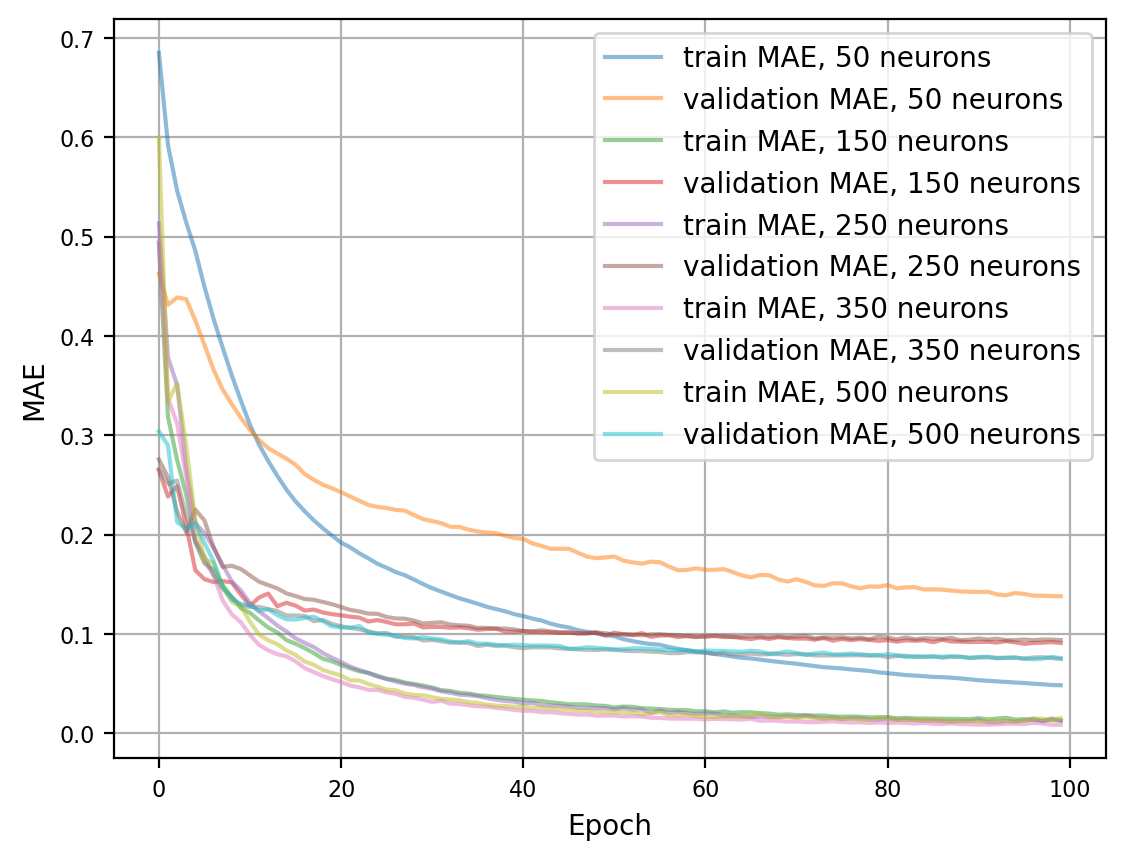

In [336]:
from tqdm import tqdm
min_mae_list = []; min_mae_val_list = [];
neurons_n_list = [50, 150, 250, 350, 500]

for unit_number in tqdm(neurons_n_list):
    input_d = keras.layers.Input(shape=(X_train.shape[1:]))
    hidden_layer_1_d = keras.layers.Dense(units=unit_number, activation="relu")(input_d)
    output_d = keras.layers.Dense(1)(hidden_layer_1_d)
    
    model_d = keras.Model(input_d, output_d)
    
    model_d.compile(loss="mean_squared_error",
                  optimizer='adam',
                  metrics=["mean_absolute_error"])

    history_d = model_d.fit(X_train_s, Y_train,
                epochs=100,
                validation_data=(X_validation_s,Y_validation))
    min_mae_train = min(history_d.history['mean_absolute_error'])
    min_mae_val = min(history_d.history['val_mean_absolute_error'])
    min_mae_val_list.append(min_mae_val)
    min_mae_list.append(min_mae_train)
    
    plt.plot(history_d.history["mean_absolute_error"], alpha=0.5, label="train MAE, {} neurons".format(unit_number))
    plt.plot(history_d.history["val_mean_absolute_error"], alpha=0.5, label="validation MAE, {} neurons".format(unit_number))

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.grid(True)
plt.legend()
plt.show()

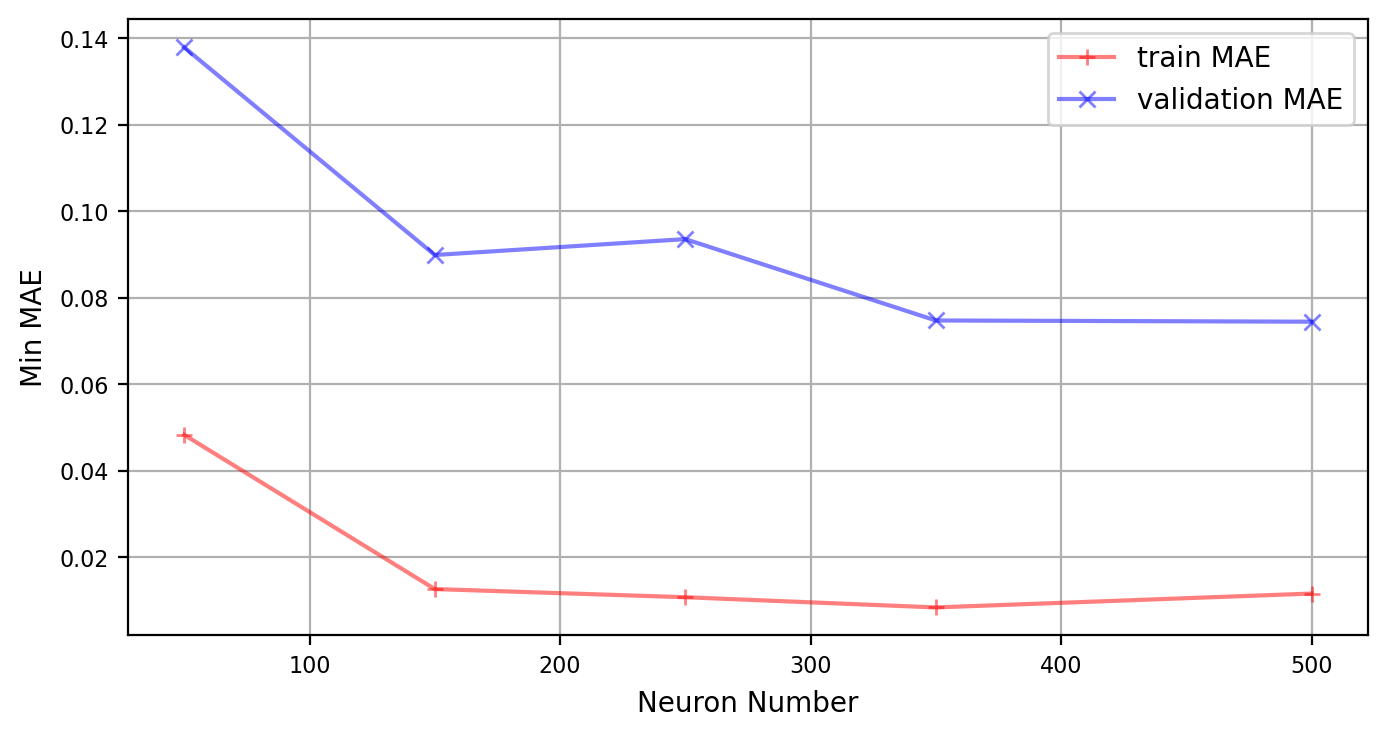

In [339]:
fig = plt.subplots(figsize=(8, 4))
plt.plot(neurons_n_list, min_mae_list, color='red', alpha=0.5, marker='+', label="train MAE")
plt.plot(neurons_n_list, min_mae_val_list, color='blue', alpha=0.5, marker='x', label="validation MAE")
plt.xlabel('Neuron Number')
plt.ylabel('Min MAE')
plt.grid(True)
plt.legend()
plt.show()

In [341]:
model_d.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)          │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 500)                 │          12,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,005 (152.37 KB)

 Trainable params: 13,001 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,004 (101.58 KB)

### Pt. 5

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - loss: 1.0275 - mean_absolute_error: 0.6195 - val_loss: 0.3192 - val_mean_absolute_error: 0.3903
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.6507 - mean_absolute_error: 0.4983 - val_loss: 0.1978 - val_mean_absolute_error: 0.3293
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.4314 - mean_absolute_error: 0.4532 - val_loss: 0.1487 - val_mean_absolute_error: 0.3057
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.2997 - mean_absolute_error: 0.4168 - val_loss: 0.1300 - val_mean_absolute_error: 0.2886
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.2565 - mean_absolute_error: 0.3947 - val_loss: 0.1176 - val_mean_absolute_error: 0.2681
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2051 - mean_absolute_error: 0.3525 - val_loss: 0.1070 - val_mean_absolute_error: 0.2539
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1720 - mean_absolute_error: 0.3096 - val_loss: 0.10

 25%|█████████████████████                                                               | 1/4 [00:46<02:19, 46.57s/it]

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - loss: 0.8840 - mean_absolute_error: 0.6497 - val_loss: 0.2475 - val_mean_absolute_error: 0.3872
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2704 - mean_absolute_error: 0.3993 - val_loss: 0.1054 - val_mean_absolute_error: 0.2747
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2237 - mean_absolute_error: 0.3598 - val_loss: 0.1044 - val_mean_absolute_error: 0.2612
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1723 - mean_absolute_error: 0.3264 - val_loss: 0.1174 - val_mean_absolute_error: 0.2741
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0954 - mean_absolute_error: 0.2446 - val_loss: 0.1038 - val_mean_absolute_error: 0.2327
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0722 - mean_absolute_error: 0.1935 - val_loss: 0.1096 - val_mean_absolute_error: 0.2320
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0656 - mean_absolute_error: 0.1895 - val_loss: 0.09

 50%|██████████████████████████████████████████                                          | 2/4 [01:08<01:04, 32.35s/it]

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - loss: 0.6937 - mean_absolute_error: 0.5907 - val_loss: 0.2238 - val_mean_absolute_error: 0.3029
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3263 - mean_absolute_error: 0.3803 - val_loss: 0.1208 - val_mean_absolute_error: 0.2993
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1611 - mean_absolute_error: 0.2912 - val_loss: 0.0719 - val_mean_absolute_error: 0.2101
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0745 - mean_absolute_error: 0.2127 - val_loss: 0.1156 - val_mean_absolute_error: 0.2618
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0547 - mean_absolute_error: 0.1912 - val_loss: 0.0547 - val_mean_absolute_error: 0.1850
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.1537 - val_loss: 0.0632 - val_mean_absolute_error: 0.1919
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0358 - mean_absolute_error: 0.1379 - val_loss: 0.04

 75%|███████████████████████████████████████████████████████████████                     | 3/4 [01:30<00:27, 27.19s/it]

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - loss: 0.7760 - mean_absolute_error: 0.6483 - val_loss: 0.3809 - val_mean_absolute_error: 0.5024
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3079 - mean_absolute_error: 0.4388 - val_loss: 0.0973 - val_mean_absolute_error: 0.2419
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1684 - mean_absolute_error: 0.3220 - val_loss: 0.1951 - val_mean_absolute_error: 0.3434
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0839 - mean_absolute_error: 0.2266 - val_loss: 0.1163 - val_mean_absolute_error: 0.2945
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0787 - mean_absolute_error: 0.2326 - val_loss: 0.1301 - val_mean_absolute_error: 0.2986
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.1834 - val_loss: 0.0489 - val_mean_absolute_error: 0.1614
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0410 - mean_absolute_error: 0.1562 - val_loss: 0.07

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:51<00:00, 27.83s/it]


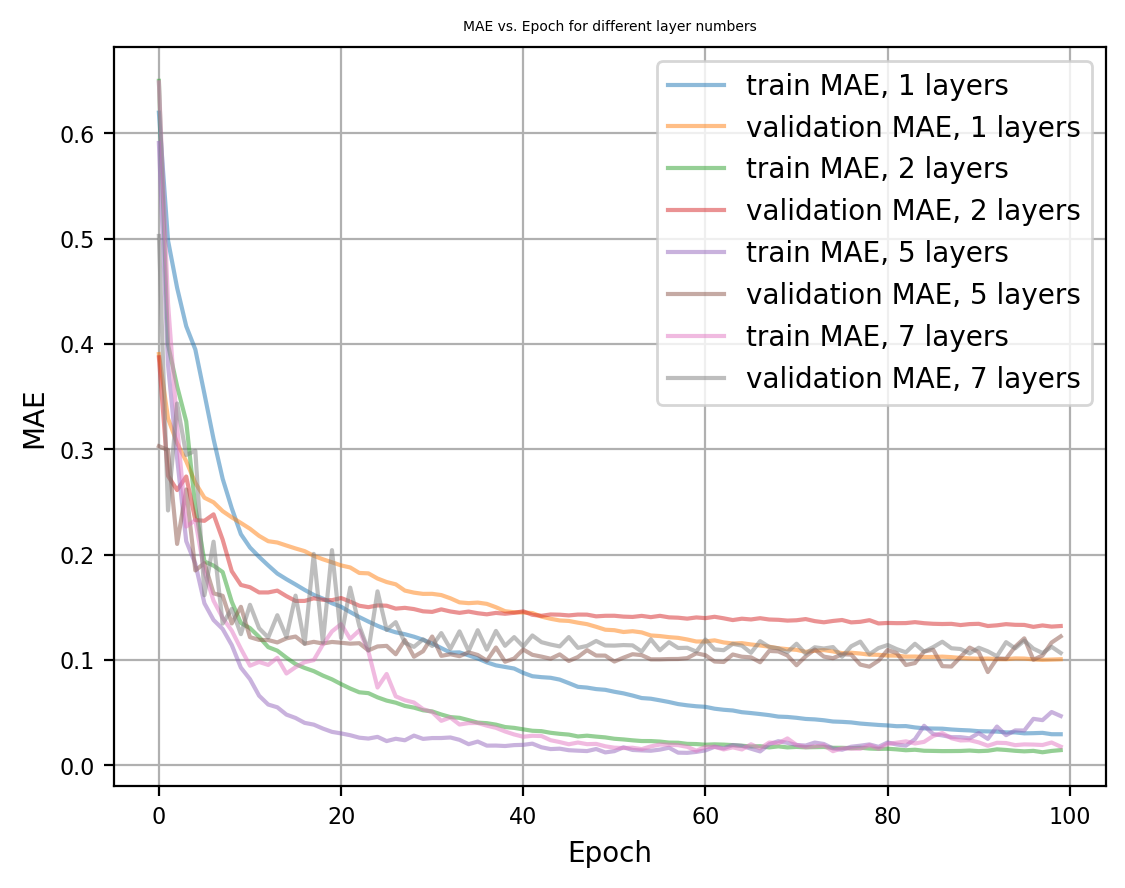

In [344]:
from tqdm import tqdm
min_mae_list_mult = []; min_mae_val_list_mult = [];
layers_n_list = [1,2,5,7]

for layer_number in tqdm(layers_n_list):
    model_mult = keras.Sequential()
    model_mult.add(keras.layers.Input(shape=X_train.shape[1:]))
    for i in range(layer_number):
        model_mult.add(keras.layers.Dense(units=100, activation="relu"))
    model_mult.add(keras.layers.Dense(1))

    model_mult.compile(loss="mean_squared_error",
                  optimizer='adam',
                  metrics=["mean_absolute_error"])

    history_mult = model_mult.fit(X_train_s, Y_train,
                epochs=100,
                validation_data=(X_validation_s,Y_validation))
    
    min_mae_train_mult = min(history_mult.history['mean_absolute_error'])
    min_mae_val_mult = min(history_mult.history['val_mean_absolute_error'])
    min_mae_val_list_mult.append(min_mae_val_mult)
    min_mae_list_mult.append(min_mae_train_mult)
    
    plt.plot(history_mult.history["mean_absolute_error"], alpha=0.5, label="train MAE, {} layers".format(layer_number))
    plt.plot(history_mult.history["val_mean_absolute_error"], alpha=0.5, label="validation MAE, {} layers".format(layer_number))
plt.title('MAE vs. Epoch for different layer numbers')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.grid(True)
plt.legend()
plt.show()

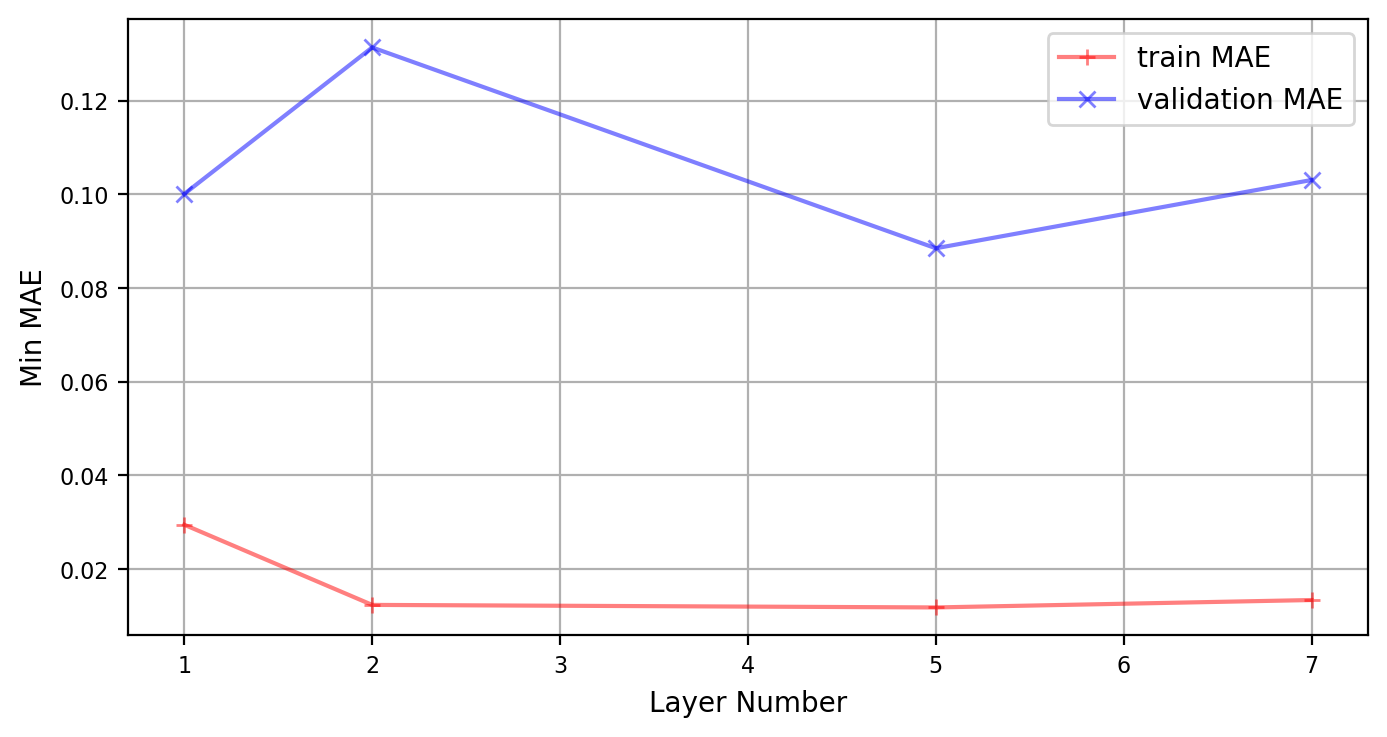

In [352]:
fig = plt.subplots(figsize=(8, 4))
plt.plot(layers_n_list, min_mae_list_mult, color='red', alpha=0.5, marker='+', label="train MAE")
plt.plot(layers_n_list, min_mae_val_list_mult, color='blue', alpha=0.5, marker='x', label="validation MAE")
plt.xlabel('Layer Number')
plt.ylabel('Min MAE')
plt.grid(True)
plt.legend()
plt.show()

- Increasing the number of neurons initially improves performance due to higher model capacity. However, beyond a certain point the validation MAE increases, indicating overfitting.
- Same as before, after a certain point, the validation MAE increases, indicating overfitting and optimization difficulty. This suggests that deeper networks are not necessarily better for this dataset.

### Pt. 6

In [373]:
class WideAndDeepANN(keras.Model):
    def __init__(self, activation="relu", **kwargs): 
        #kwargs : key-word-arguement. 
        #**kwargs in a function: it means we can give it however many kwargs as we want.
        super().__init__(**kwargs) 
        #Input is the kwargs. 
        # self.input_ =  keras.layers.Input(shape=X_train.shape[1:])
        self.hidden_layer_1 = keras.layers.Dense(150, activation=activation)
        self.hidden_layer_2 = keras.layers.Dense(125, activation=activation)
        self.hidden_layer_3 = keras.layers.Dense(100, activation=activation)
        self.hidden_layer_4 = keras.layers.Dense(75, activation=activation)
        self.hidden_layer_5 = keras.layers.Dense(50, activation=activation)
        #Output
        self.final_output   = keras.layers.Dense(1)

    def call(self, inputs):
        inputs_ = inputs
        h1_out = self.hidden_layer_1(inputs_)
        h2_out = self.hidden_layer_2(h1_out)
        h3_out = self.hidden_layer_3(h2_out)
        h4_out = self.hidden_layer_4(h3_out)
        h5_out = self.hidden_layer_5(h4_out)
        concat_out = keras.layers.concatenate([inputs_, h5_out]) #This is a connection layer, so it will be in the class function.
        final_out = self.final_output(concat_out)
        return final_out

In [375]:
model_wad = WideAndDeepANN()

In [377]:
model_wad.compile(loss=["mse"],
              optimizer="adam",
              metrics=["mae"])

In [388]:
model_wad.fit(X_train_s, Y_train, epochs=100,
              validation_data=(X_validation_s, Y_validation))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0011 - mae: 0.0235 - val_loss: 0.0257 - val_mae: 0.1244
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0019 - mae: 0.0314 - val_loss: 0.0295 - val_mae: 0.1321
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0016 - mae: 0.0287 - val_loss: 0.0277 - val_mae: 0.1361
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 8.0259e-04 - mae: 0.0212 - val_loss: 0.0243 - val_mae: 0.1173
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0011 - mae: 0.0253 - val_loss: 0.0269 - val_mae: 0.1292
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.8404e-04 - mae: 0.0216 - val_loss: 0.0292 - val_mae: 0.1336
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0014 - mae: 0.0264 - val_loss: 0.0257 - val_mae: 0.1255
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.1064e-04 - mae: 0.0215 - val_loss: 0.0256 - val_mae: 0.1218
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.

In [390]:
model_wad.summary()

Model: "wide_and_deep_ann_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_85 (Dense)                     │ (None, 150)                 │           3,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 125)                 │          18,875 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 100)                 │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 50)                  │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 1)                   │              75 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,027 (546.98 KB)

 Trainable params: 46,675 (182.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,352 (364.66 KB)

In [392]:
model_wad.evaluate(X_test_s, Y_test_rest, verbose=0)

[0.06827917695045471, 0.1639334112405777]

In [394]:
x_test_10 = X_test_s[0:10]
pred_10 = model_wad.predict(x_test_10)
# pred_10_idx = np.argmax(model_wad.predict(x_test_10), axis=1)
pred_10,Y_test_rest[0:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


(array([[ 2.146701  ],
        [ 0.35898095],
        [-0.51313466],
        [ 0.03259629],
        [ 1.8019391 ],
        [-0.7419772 ],
        [-0.81901383],
        [-0.58748543],
        [-0.7795923 ],
        [-0.5973546 ]], dtype=float32),
 array([ 2.19381802,  0.57501053, -0.46775629, -0.17902486,  1.87861013,
        -0.68734778, -0.68872807, -0.50427122, -0.38631922, -0.69035932]))

-----